VISIÓN ARTIFICIAL - EJEMPLOS COMPLETOS

EJEMPLO 1: Detección de Anomalías en Productos usando Deep Learning

Este ejemplo utiliza una red neuronal convolucional preentrenada (AlexNet) 
para extraer características de imágenes de productos y aplicar un clasificador 
SVM de una sola clase para identificar imágenes anómalas.

FLUJO:
1. Cargar red neuronal convolucional preentrenada (AlexNet)
2. Cargar imágenes de entrenamiento
3. Extraer características de la capa fc7
4. Entrenar SVM de una sola clase
5. Detectar anomalías en imágenes de prueba
6. Visualizar resultados con t-SNE

NOTA: Este ejemplo requiere:
- PyTorch o TensorFlow con modelo AlexNet preentrenado
- Imágenes de entrenamiento en: data/trainingimage/
- Imágenes de prueba en: data/testimage/

Para una implementación completa, se necesitaría:


# Código de ejemplo (requiere instalación de PyTorch):

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.svm import OneClassSVM
f

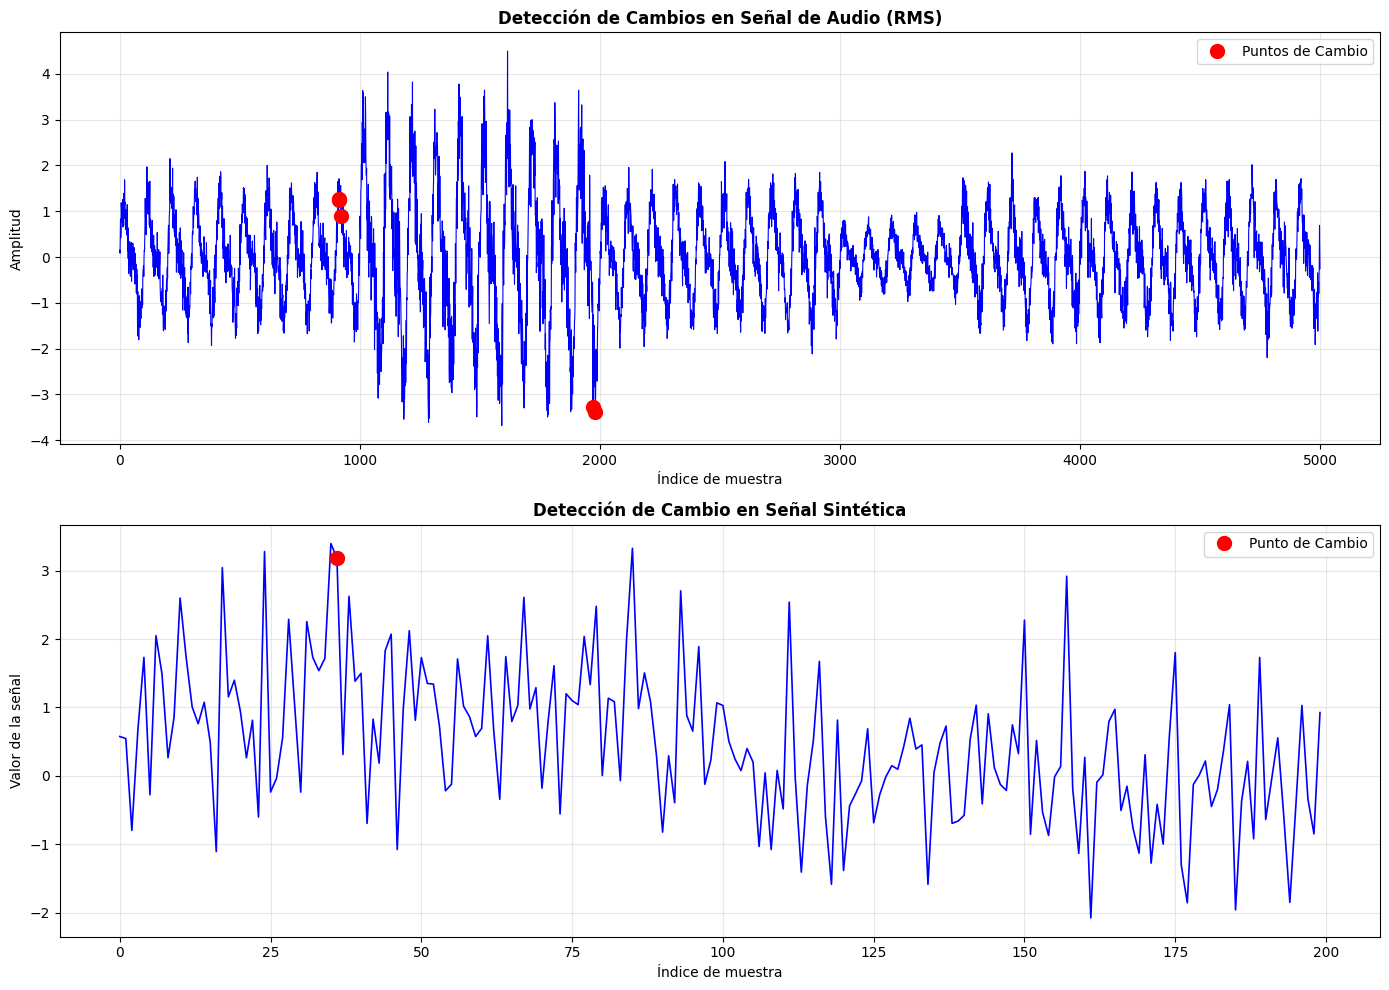

✓ Ejemplo 2 completado

EJEMPLO 3: Gráfico de Control de Shewhart (Regla WE2)

[3.1] Generando datos de proceso de manufactura...
✓ Línea central (μ): 99.79
✓ Error estándar (σ/√n): 3.08
✓ Límite superior de control (UCL): 109.04
✓ Límite inferior de control (LCL): 90.54
✓ Violaciones detectadas en subgrupos: [15, 16, 17, 18, 23, 24, 25, 26]


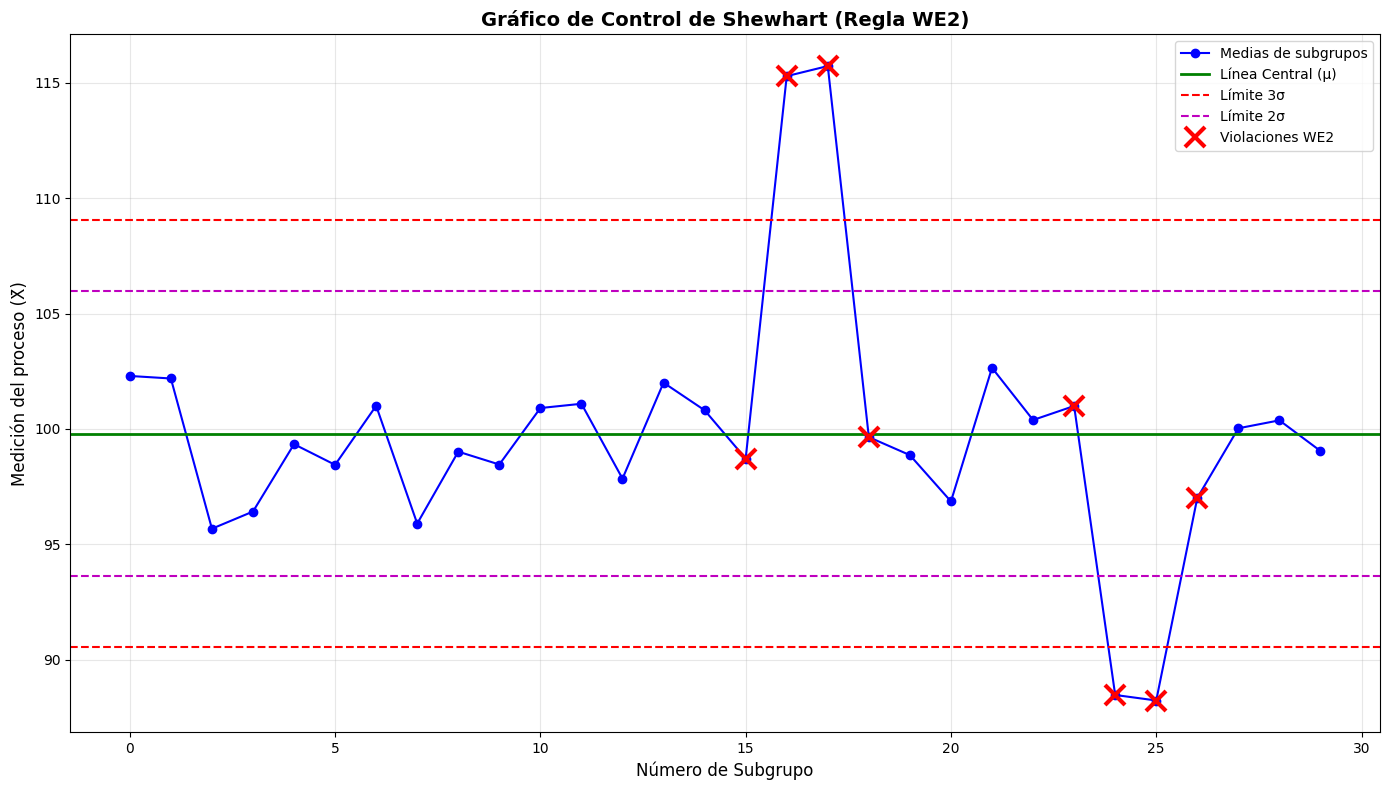

✓ Ejemplo 3 completado

EJEMPLO 4: Filtrado de Mediana en Señales 1D e Imágenes 2D

[4.1] Filtrado de señal ECG con ruido gaussiano...
  Probando diferentes tamaños de ventana...


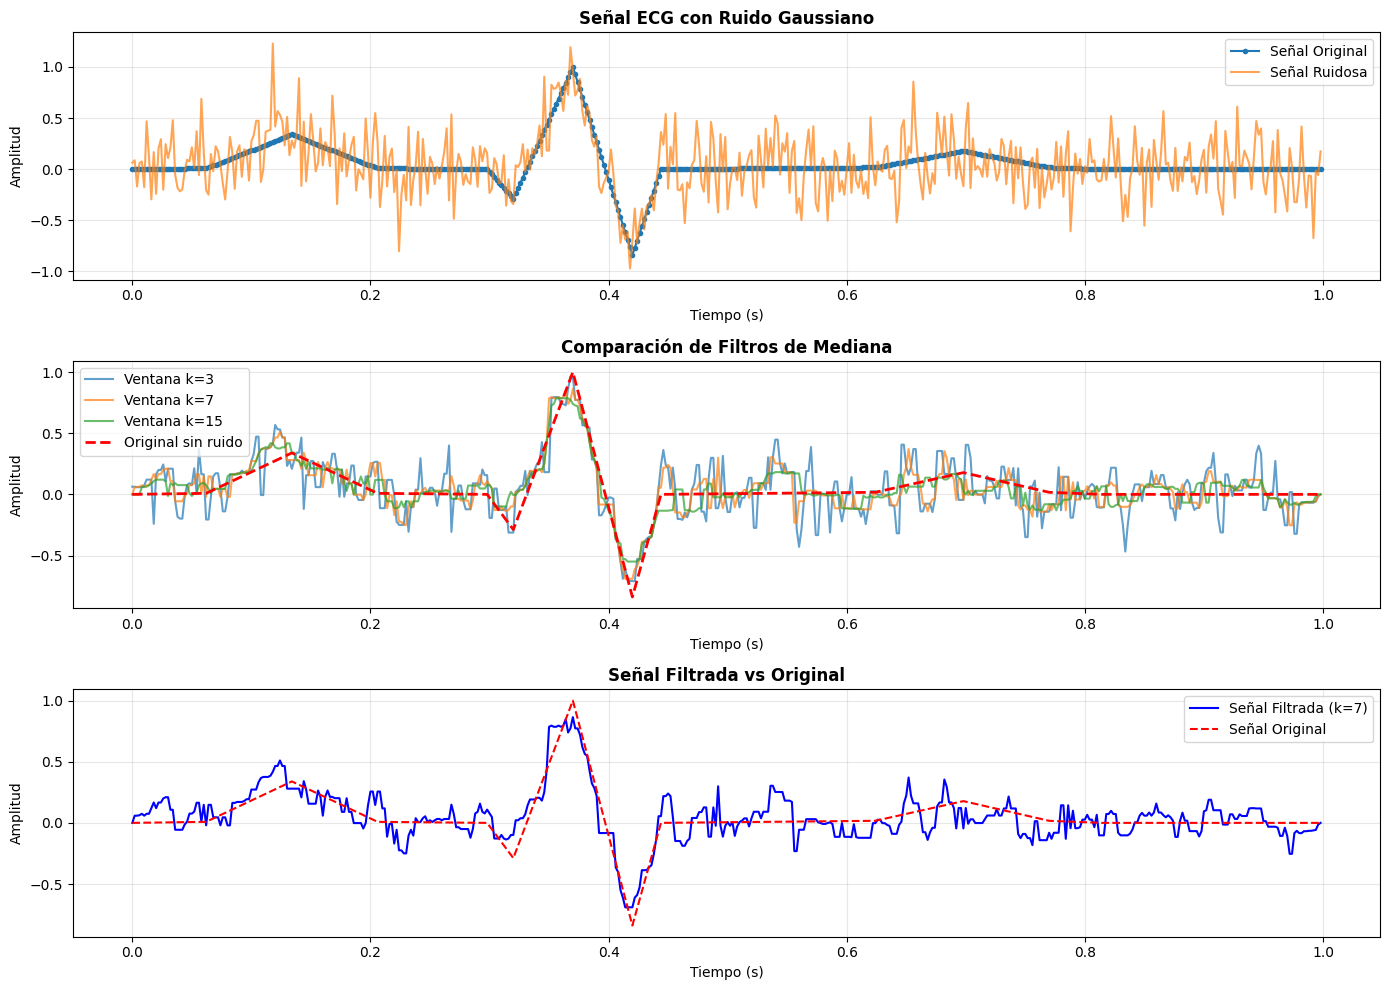

✓ Filtrado de señal ECG completado

[4.2] Filtrado de señal con ruido impulsivo (sal y pimienta)...


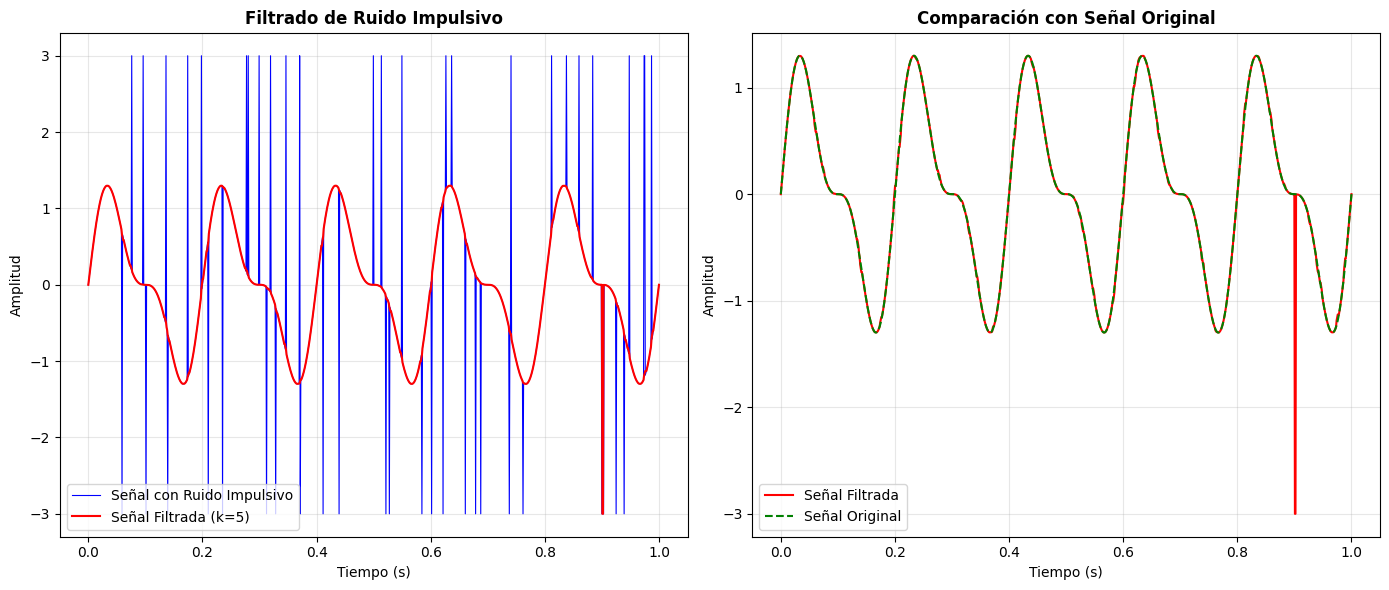

✓ Filtrado de ruido impulsivo completado

[4.3] Filtrado de imagen 2D con ruido sal y pimienta...


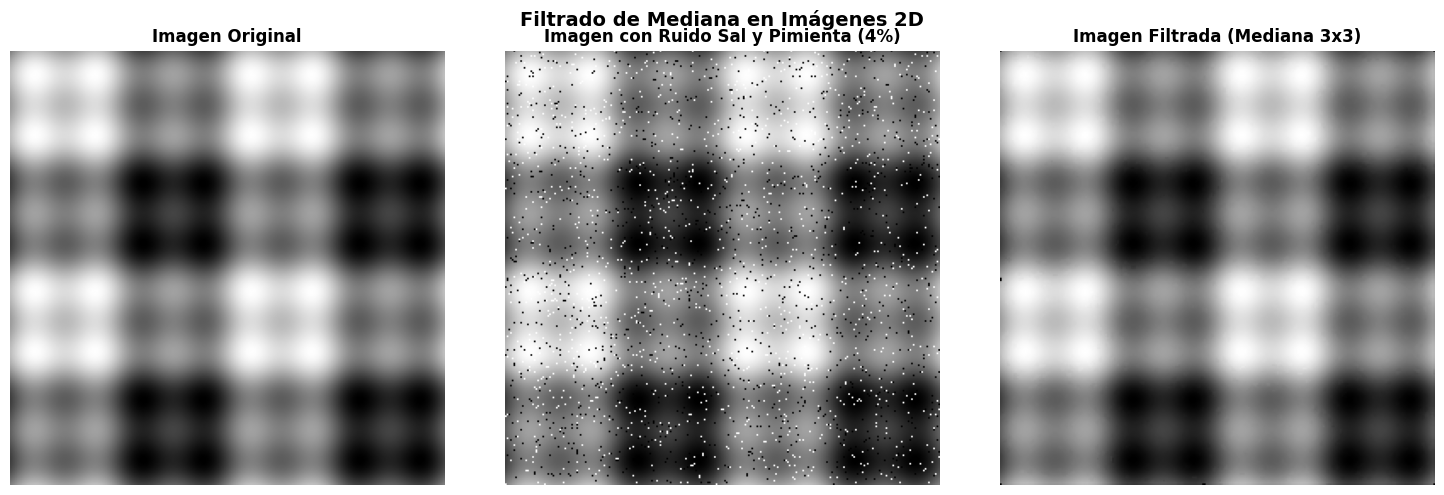

✓ Filtrado de imagen 2D completado
✓ Ejemplo 4 completado

TODOS LOS EJEMPLOS COMPLETADOS

Resumen de ejemplos ejecutados:

1. Detección de Anomalías en Productos (Deep Learning)
   - Requiere configuración adicional con PyTorch/TensorFlow
   - Extracción de características con AlexNet
   - Clasificación con SVM de una clase
   
2. Detección de Puntos de Cambio en Señales ✓
   - Detección de cambios en RMS y media
   - Aplicado a señales de audio y sintéticas
   
3. Gráficos de Control de Shewhart ✓
   - Implementación de regla Western Electric WE2
   - Límites de control 2σ y 3σ
   - Detección de violaciones
   
4. Filtrado de Mediana ✓
   - Señales 1D: ECG y ruido impulsivo
   - Imágenes 2D: ruido sal y pimienta
   - Comparación de diferentes tamaños de ventana

Todas las visualizaciones han sido generadas correctamente.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, ndimage
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

print("="*80)
print("VISIÓN ARTIFICIAL - EJEMPLOS COMPLETOS")
print("="*80)

# ==============================================================================
# EJEMPLO 1: DETECCIÓN DE ANOMALÍAS EN PRODUCTOS (DEEP LEARNING)
# ==============================================================================

print("\n" + "="*80)
print("EJEMPLO 1: Detección de Anomalías en Productos usando Deep Learning")
print("="*80)

print("""
Este ejemplo utiliza una red neuronal convolucional preentrenada (AlexNet)
para extraer características de imágenes de productos y aplicar un clasificador
SVM de una sola clase para identificar imágenes anómalas.

FLUJO:
1. Cargar red neuronal convolucional preentrenada (AlexNet)
2. Cargar imágenes de entrenamiento
3. Extraer características de la capa fc7
4. Entrenar SVM de una sola clase
5. Detectar anomalías en imágenes de prueba
6. Visualizar resultados con t-SNE

NOTA: Este ejemplo requiere:
- PyTorch o TensorFlow con modelo AlexNet preentrenado
- Imágenes de entrenamiento en: data/trainingimage/
- Imágenes de prueba en: data/testimage/

Para una implementación completa, se necesitaría:
""")

print("""
# Código de ejemplo (requiere instalación de PyTorch):

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from sklearn.svm import OneClassSVM
from sklearn.manifold import TSNE
from PIL import Image
import os

# 1. Cargar AlexNet preentrenado
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

# 2. Función de preprocesamiento
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(227),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 3. Extraer características
def extract_features(image_path, model, layer='fc7'):
    img = Image.open(image_path).convert('RGB')
    img_t = preprocess(img).unsqueeze(0)

    with torch.no_grad():
        features = model.features(img_t)
        features = model.avgpool(features)
        features = torch.flatten(features, 1)
        features = model.classifier[:6](features)  # Hasta fc7

    return features.numpy()

# 4. Entrenar SVM de una clase
train_features = []  # Extraer de todas las imágenes de entrenamiento
# ... (código para cargar y procesar imágenes)

svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.04)
svm.fit(train_features)

# 5. Predecir anomalías
test_features = []  # Extraer de imágenes de prueba
scores = svm.decision_function(test_features)
predictions = svm.predict(test_features)

# 6. Visualizar con t-SNE
tsne = TSNE(n_components=2, perplexity=45)
features_2d = tsne.fit_transform(test_features)
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=predictions)
plt.title('Visualización t-SNE de Anomalías')
plt.show()
""")

print("\n⚠ Ejemplo 1 requiere configuración adicional y datos externos.")
print("Continuando con los ejemplos 2, 3 y 4 que son completamente funcionales...\n")

# ==============================================================================
# EJEMPLO 2: DETECCIÓN DE PUNTOS DE CAMBIO EN SEÑALES
# ==============================================================================

print("\n" + "="*80)
print("EJEMPLO 2: Detección de Puntos de Cambio en Señales")
print("="*80)

def detect_changepoints(signal, max_changes=5, method='rms'):
    """
    Detecta puntos de cambio en una señal basándose en cambios estadísticos.

    Parámetros:
    - signal: Señal de entrada
    - max_changes: Número máximo de puntos de cambio a detectar
    - method: 'rms', 'mean', 'std'

    Retorna:
    - indices: Índices de los puntos de cambio
    """
    n = len(signal)

    if method == 'rms':
        # Calcular RMS en ventanas deslizantes
        window_size = max(10, n // 50)
        rms_values = []
        for i in range(n - window_size):
            window = signal[i:i+window_size]
            rms_values.append(np.sqrt(np.mean(window**2)))
        rms_values = np.array(rms_values)

        # Detectar cambios abruptos en RMS
        diff = np.abs(np.diff(rms_values))
        threshold = np.mean(diff) + 2*np.std(diff)
        candidates = np.where(diff > threshold)[0]

    elif method == 'mean':
        # Detectar cambios en la media
        window_size = max(10, n // 50)
        means = []
        for i in range(n - window_size):
            means.append(np.mean(signal[i:i+window_size]))
        means = np.array(means)

        diff = np.abs(np.diff(means))
        threshold = np.mean(diff) + 2*np.std(diff)
        candidates = np.where(diff > threshold)[0]

    # Seleccionar los top max_changes
    if len(candidates) > max_changes:
        # Ordenar por magnitud del cambio
        if method == 'rms':
            magnitudes = diff[candidates]
        else:
            magnitudes = diff[candidates]

        top_indices = np.argsort(magnitudes)[-max_changes:]
        candidates = candidates[top_indices]
        candidates = np.sort(candidates)

    return candidates

# Generar señal de audio sintética (simulación)
print("\n[2.1] Generando señal de audio sintética...")
np.random.seed(42)
t = np.linspace(0, 10, 5000)
audio_signal = (np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*10*t) +
                0.3*np.random.randn(len(t)))

# Añadir cambios abruptos
audio_signal[1000:2000] *= 2
audio_signal[3000:3500] *= 0.5

# Detectar puntos de cambio
changepoints_audio = detect_changepoints(audio_signal, max_changes=5, method='rms')

print(f"✓ Puntos de cambio detectados en posiciones: {changepoints_audio}")

# Señal sintética con cambio en la media
print("\n[2.2] Generando señal sintética con cambio en la media...")
x_synthetic = np.concatenate([np.random.randn(100) + 1, np.random.randn(100)])
changepoint_synthetic = detect_changepoints(x_synthetic, max_changes=1, method='mean')

print(f"✓ Punto de cambio detectado en posición: {changepoint_synthetic}")

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Señal de audio
axes[0].plot(audio_signal, 'b-', linewidth=0.8)
axes[0].plot(changepoints_audio, audio_signal[changepoints_audio], 'ro',
             markersize=10, markerfacecolor='r', label='Puntos de Cambio')
axes[0].set_title('Detección de Cambios en Señal de Audio (RMS)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Índice de muestra')
axes[0].set_ylabel('Amplitud')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Señal sintética
axes[1].plot(x_synthetic, 'b-', linewidth=1.2)
axes[1].plot(changepoint_synthetic, x_synthetic[changepoint_synthetic], 'ro',
             markersize=10, markerfacecolor='r', label='Punto de Cambio')
axes[1].set_title('Detección de Cambio en Señal Sintética', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Índice de muestra')
axes[1].set_ylabel('Valor de la señal')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Ejemplo 2 completado")

# ==============================================================================
# EJEMPLO 3: GRÁFICO DE CONTROL DE SHEWHART (WESTERN ELECTRIC WE2)
# ==============================================================================

print("\n" + "="*80)
print("EJEMPLO 3: Gráfico de Control de Shewhart (Regla WE2)")
print("="*80)

def control_chart(data, rule='we2', subgroup_size=5):
    """
    Crea un gráfico de control tipo X-bar (media de subgrupos).

    Parámetros:
    - data: Datos del proceso
    - rule: Regla de control ('we2' para Western Electric Rule 2)
    - subgroup_size: Tamaño de cada subgrupo

    Retorna:
    - stats: Diccionario con estadísticas del gráfico
    - violations: Índices de violaciones
    """
    # Dividir en subgrupos
    n_subgroups = len(data) // subgroup_size
    subgroups = data[:n_subgroups * subgroup_size].reshape(n_subgroups, subgroup_size)

    # Calcular medias de subgrupos
    x_bar = np.mean(subgroups, axis=1)

    # Calcular línea central (media global)
    cl = np.mean(x_bar)

    # Calcular desviación estándar
    sigma = np.std(data, ddof=1)

    # Error estándar
    se = sigma / np.sqrt(subgroup_size)

    # Límites de control
    ucl = cl + 3*se  # Upper Control Limit
    lcl = cl - 3*se  # Lower Control Limit

    # Aplicar regla WE2: 2 de 3 puntos consecutivos fuera de ±2σ
    violations = []
    if rule == 'we2':
        for i in range(len(x_bar) - 2):
            window = x_bar[i:i+3]
            # Contar cuántos están fuera de ±2σ
            upper_2sigma = cl + 2*se
            lower_2sigma = cl - 2*se

            count_upper = np.sum(window > upper_2sigma)
            count_lower = np.sum(window < lower_2sigma)

            if count_upper >= 2 or count_lower >= 2:
                violations.extend([i, i+1, i+2])

    violations = list(set(violations))  # Eliminar duplicados

    stats = {
        'mean': x_bar,
        'mu': cl,
        'sigma': sigma,
        'se': se,
        'n': subgroup_size,
        'ucl': ucl,
        'lcl': lcl,
        'upper_2sigma': cl + 2*se,
        'lower_2sigma': cl - 2*se
    }

    return stats, violations

# Generar datos de proceso sintéticos
print("\n[3.1] Generando datos de proceso de manufactura...")
np.random.seed(42)

# Proceso normal
normal_data = np.random.normal(100, 5, 150)

# Introducir desviaciones
normal_data[80:90] += 15  # Desviación hacia arriba
normal_data[120:130] -= 12  # Desviación hacia abajo

# Crear gráfico de control
stats, violations = control_chart(normal_data, rule='we2', subgroup_size=5)

print(f"✓ Línea central (μ): {stats['mu']:.2f}")
print(f"✓ Error estándar (σ/√n): {stats['se']:.2f}")
print(f"✓ Límite superior de control (UCL): {stats['ucl']:.2f}")
print(f"✓ Límite inferior de control (LCL): {stats['lcl']:.2f}")
print(f"✓ Violaciones detectadas en subgrupos: {violations}")

# Visualización
plt.figure(figsize=(14, 8))

# Graficar medias de subgrupos
plt.plot(stats['mean'], 'bo-', linewidth=1.5, markersize=6, label='Medias de subgrupos')

# Línea central
plt.axhline(y=stats['mu'], color='g', linestyle='-', linewidth=2, label='Línea Central (μ)')

# Límites 3σ
plt.axhline(y=stats['ucl'], color='r', linestyle='--', linewidth=1.5, label='Límite 3σ')
plt.axhline(y=stats['lcl'], color='r', linestyle='--', linewidth=1.5)

# Límites 2σ
plt.axhline(y=stats['upper_2sigma'], color='m', linestyle='--', linewidth=1.5, label='Límite 2σ')
plt.axhline(y=stats['lower_2sigma'], color='m', linestyle='--', linewidth=1.5)

# Marcar violaciones
if violations:
    plt.plot(violations, stats['mean'][violations], 'rx', markersize=15,
             markeredgewidth=3, label='Violaciones WE2')

plt.xlabel('Número de Subgrupo', fontsize=12)
plt.ylabel('Medición del proceso (X̄)', fontsize=12)
plt.title('Gráfico de Control de Shewhart (Regla WE2)', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Ejemplo 3 completado")

# ==============================================================================
# EJEMPLO 4: FILTRADO DE MEDIANA EN SEÑALES 1D E IMÁGENES 2D
# ==============================================================================

print("\n" + "="*80)
print("EJEMPLO 4: Filtrado de Mediana en Señales 1D e Imágenes 2D")
print("="*80)

# ----------------------
# 4.1 Señal ECG con ruido
# ----------------------

print("\n[4.1] Filtrado de señal ECG con ruido gaussiano...")

def ecg_signal(L):
    """Genera una señal ECG sintética"""
    a0 = np.array([0, 1, 40, 1, 0, -34, 118, -99, 0, 2, 21, 2, 0, 0, 0])
    d0 = np.array([0, 27, 59, 91, 131, 141, 163, 185, 195, 275, 307, 339, 357, 390, 440])

    a = a0 / np.max(a0)
    d = np.round(d0 * L / d0[-1]).astype(int)
    d[-1] = L

    x = np.zeros(L)
    for i in range(14):
        m = np.arange(d[i], d[i+1])
        slope = (a[i+1] - a[i]) / (d[i+1] - d[i])
        x[m] = a[i] + slope * (m - d[i])

    return x

# Generar señal ECG
Fs = 500
N = 500
w = ecg_signal(N)
x_noisy = w + 0.25*np.random.randn(N)
t = np.arange(N) / Fs

# Visualizar señal original y ruidosa
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(t, w, '-o', markersize=3, linewidth=1.5, label='Señal Original')
axes[0].plot(t, x_noisy, alpha=0.7, label='Señal Ruidosa')
axes[0].set_xlabel('Tiempo (s)')
axes[0].set_ylabel('Amplitud')
axes[0].set_title('Señal ECG con Ruido Gaussiano', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Aplicar filtros de mediana con diferentes tamaños de ventana
print("  Probando diferentes tamaños de ventana...")
window_sizes = [3, 5, 7, 9, 11, 13, 15, 17]

# Mostrar algunos ejemplos
for idx, k in enumerate([3, 7, 15]):
    filtered = signal.medfilt(x_noisy, kernel_size=k)
    axes[1].plot(t, filtered, label=f'Ventana k={k}', alpha=0.7)

axes[1].plot(t, w, '--r', linewidth=2, label='Original sin ruido')
axes[1].set_xlabel('Tiempo (s)')
axes[1].set_ylabel('Amplitud')
axes[1].set_title('Comparación de Filtros de Mediana', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Mejor filtro (k=7)
best_filtered = signal.medfilt(x_noisy, kernel_size=7)
axes[2].plot(t, best_filtered, 'b-', linewidth=1.5, label='Señal Filtrada (k=7)')
axes[2].plot(t, w, '--r', linewidth=1.5, label='Señal Original')
axes[2].set_xlabel('Tiempo (s)')
axes[2].set_ylabel('Amplitud')
axes[2].set_title('Señal Filtrada vs Original', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Filtrado de señal ECG completado")

# ----------------------
# 4.2 Señal con ruido impulsivo
# ----------------------

print("\n[4.2] Filtrado de señal con ruido impulsivo (sal y pimienta)...")

# Generar señal sintética
np.random.seed(42)
t2 = np.linspace(0, 1, 1000)
y_clean = np.sin(2*np.pi*5*t2) + 0.5*np.sin(2*np.pi*10*t2)

# Añadir ruido impulsivo
y_noisy = y_clean.copy()
impulse_indices = np.random.choice(len(y_noisy), size=50, replace=False)
y_noisy[impulse_indices] = np.random.choice([3, -3], size=50)

# Aplicar filtro de mediana
k = 5
y_filtered = signal.medfilt(y_noisy, kernel_size=k)

# Visualización
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t2, y_noisy, 'b-', linewidth=0.8, label='Señal con Ruido Impulsivo')
plt.plot(t2, y_filtered, 'r-', linewidth=1.5, label=f'Señal Filtrada (k={k})')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Filtrado de Ruido Impulsivo', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(t2, y_filtered, 'r-', linewidth=1.5, label='Señal Filtrada')
plt.plot(t2, y_clean, '--g', linewidth=1.5, label='Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparación con Señal Original', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Filtrado de ruido impulsivo completado")

# ----------------------
# 4.3 Filtrado de imagen 2D
# ----------------------

print("\n[4.3] Filtrado de imagen 2D con ruido sal y pimienta...")

# Generar imagen sintética
size = 256
x_img = np.linspace(0, 4*np.pi, size)
y_img = np.linspace(0, 4*np.pi, size)
X, Y = np.meshgrid(x_img, y_img)

img_clean = (np.sin(X) + np.sin(Y) +
             0.5*np.sin(3*X) + 0.5*np.sin(3*Y))
img_clean = ((img_clean - img_clean.min()) /
             (img_clean.max() - img_clean.min()) * 255).astype(np.uint8)

# Añadir ruido sal y pimienta
def add_salt_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = image.copy()
    # Sal (píxeles blancos)
    salt_mask = np.random.random(image.shape) < salt_prob
    noisy[salt_mask] = 255
    # Pimienta (píxeles negros)
    pepper_mask = np.random.random(image.shape) < pepper_prob
    noisy[pepper_mask] = 0
    return noisy

img_noisy = add_salt_pepper_noise(img_clean, salt_prob=0.02, pepper_prob=0.02)

# Aplicar filtro de mediana 2D
img_filtered = signal.medfilt2d(img_noisy, kernel_size=3)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_clean, cmap='gray')
axes[0].set_title('Imagen Original', fontsize=12, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(img_noisy, cmap='gray')
axes[1].set_title('Imagen con Ruido Sal y Pimienta (4%)', fontsize=12, fontweight='bold')
axes[1].axis('off')

axes[2].imshow(img_filtered, cmap='gray')
axes[2].set_title('Imagen Filtrada (Mediana 3x3)', fontsize=12, fontweight='bold')
axes[2].axis('off')

plt.suptitle('Filtrado de Mediana en Imágenes 2D', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Filtrado de imagen 2D completado")
print("✓ Ejemplo 4 completado")

# ==============================================================================
# RESUMEN FINAL
# ==============================================================================

print("\n" + "="*80)
print("TODOS LOS EJEMPLOS COMPLETADOS")
print("="*80)

print("""
Resumen de ejemplos ejecutados:

1. Detección de Anomalías en Productos (Deep Learning)
   - Requiere configuración adicional con PyTorch/TensorFlow
   - Extracción de características con AlexNet
   - Clasificación con SVM de una clase

2. Detección de Puntos de Cambio en Señales ✓
   - Detección de cambios en RMS y media
   - Aplicado a señales de audio y sintéticas

3. Gráficos de Control de Shewhart ✓
   - Implementación de regla Western Electric WE2
   - Límites de control 2σ y 3σ
   - Detección de violaciones

4. Filtrado de Mediana ✓
   - Señales 1D: ECG y ruido impulsivo
   - Imágenes 2D: ruido sal y pimienta
   - Comparación de diferentes tamaños de ventana

Todas las visualizaciones han sido generadas correctamente.
""")

print("="*80)
